<h1><center>Multiple Linear Regression with Pokemon Data</center></h1>

This notebook will build on my previous work in which a simple linear regression was used with this data, the data in question will be exploring data from Pokemon, the data consists of the Pokemons name, type of Pokemon, generation of the Pokemon and the battle attributes of the Pokemon, we will make use libraries such as Pandas, numpy and scikit-learn to use regression algorithms to predict the "Total" attribute.

In [3]:
#Load/Import libraries
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib inline

<h2>Loading in Data</h2>

In [5]:
df = pd.read_csv("Pokemon.csv")

In [6]:
#Display the five rows
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


0

In [7]:
#Drop the column '#''
df.drop(columns={'#'}, inplace=True)

In [8]:
#Show the descriptive statistics of the data
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
#Show the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [10]:
#show the columns in the dataframe
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
#Shape of the data
df.shape

(800, 12)

In [12]:
#Check the number of null values in the dataset
df.isnull().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [83]:
#Check the number of duplicates in the Pokemon dataset
df.duplicated().sum()

0

In [72]:
#Number of unique values in each column of the Pokemon dataset
df.nunique()

Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

<h2>Feature Selection</h2>

In [14]:
features = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

In [15]:
#Show the first five rows of the features
features.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


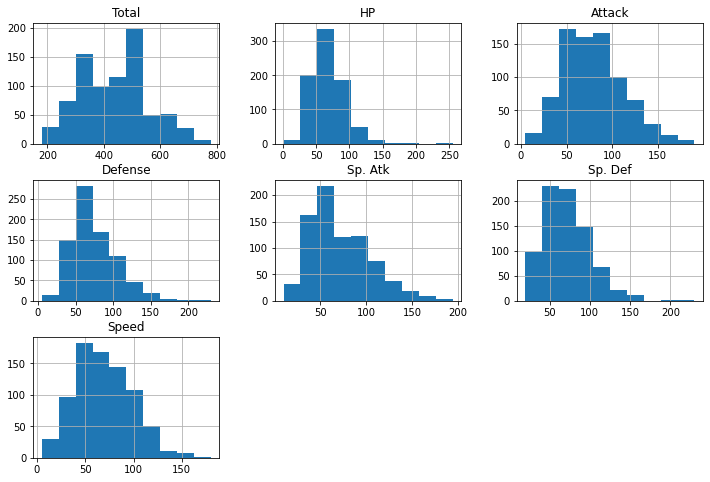

In [17]:
#Create histograms for each of the features 
features.hist(figsize=(12,8))
plt.show()

In [49]:
#Function to create a scatter plot for our dataframe
def plotscatter(dataframe, x, y):
    
    colors=['royalblue', 'darkviolet', 'saddlebrown', 'midnightblue', 'lightcoral', 'red', 'darkgreen', 'purple', 
           'olive', 'teal']
    plt.figure(figsize=(8, 5))
    plt.scatter(dataframe[x], dataframe[y], color=random.choice(colors))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'The relationship between {x} and {y}')

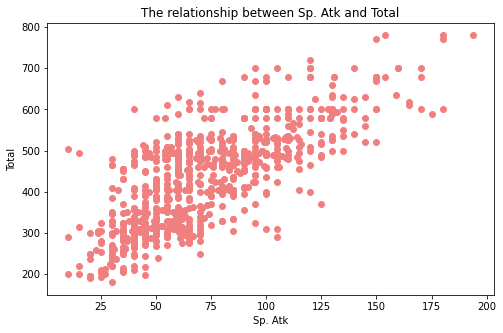

In [50]:
plotscatter(features, 'Sp. Atk', 'Total')

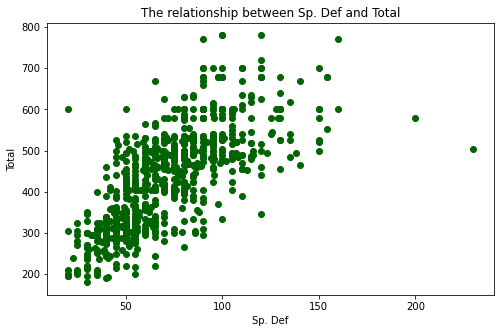

In [51]:
plotscatter(features, 'Sp. Def', 'Total')

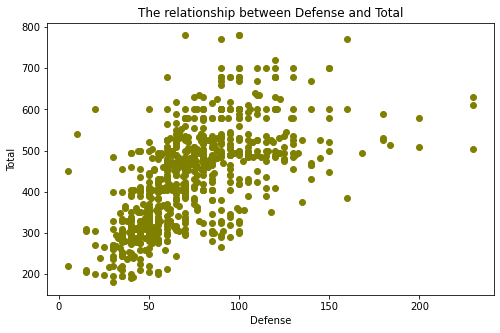

In [52]:
plotscatter(features, 'Defense', 'Total')

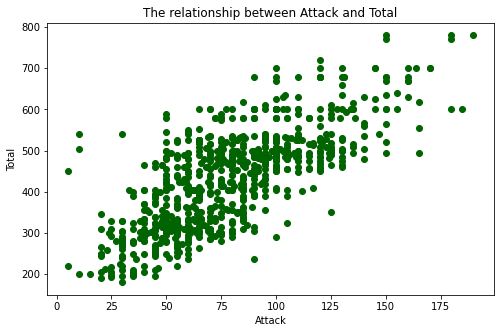

In [53]:
plotscatter(features, 'Attack', 'Total')

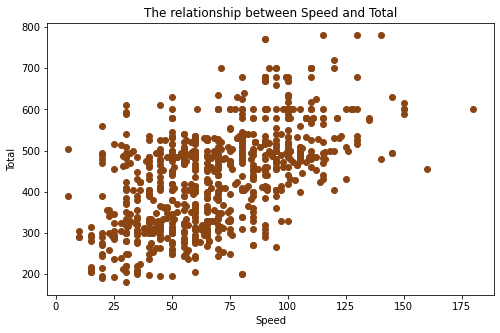

In [54]:
plotscatter(features, 'Speed', 'Total')

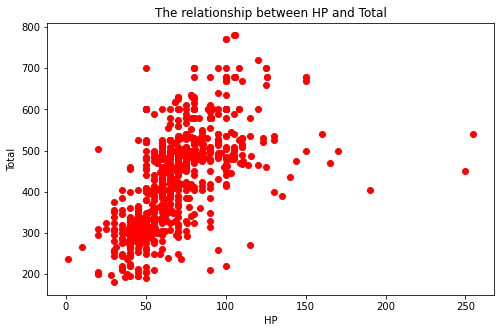

In [55]:
plotscatter(features, 'HP', 'Total')

<h2>Modelling</h2>

In this project we will be performing a Train/Test split in which we will train the with the training set ans test with the testing set. This will give us a more accurate evaluation on out-of-sample accuracy. We will use 80% of the dataset for training and 20% for testing.

In [26]:
msk = np.random.rand(len(df)) < 0.8
train = features[msk]
test = features[~msk]

<h3>Train Data Distribution</h3>

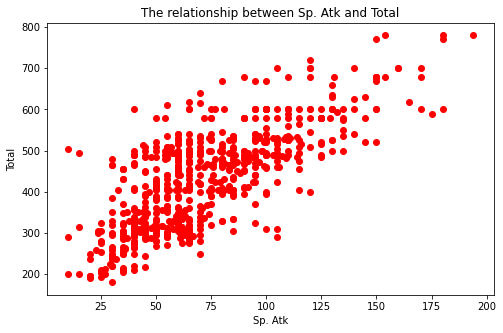

In [56]:
plotscatter(train, 'Sp. Atk', 'Total')

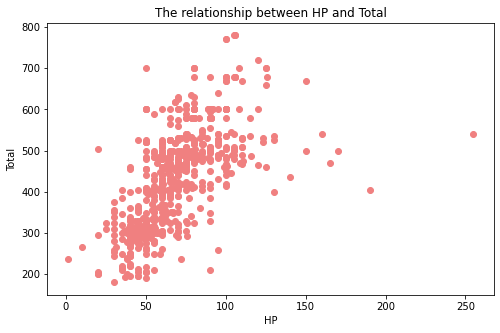

In [57]:
plotscatter(train, 'HP', 'Total')

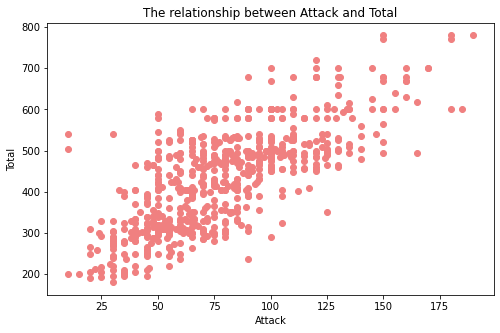

In [58]:
plotscatter(train, 'Attack', 'Total')

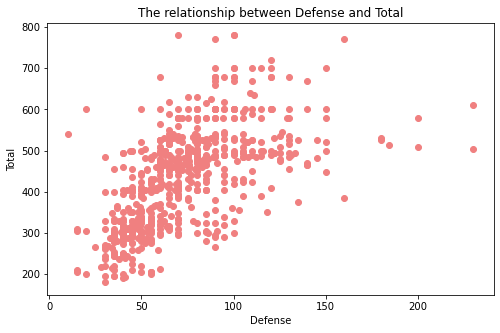

In [59]:
plotscatter(train, 'Defense', 'Total')

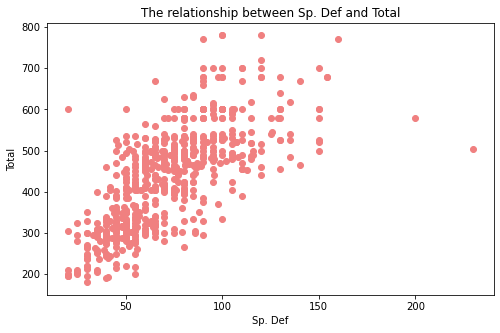

In [60]:
plotscatter(train, 'Sp. Def', 'Total')

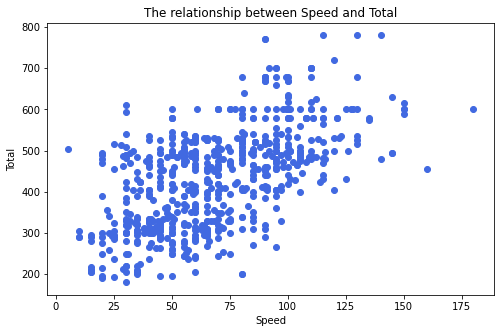

In [61]:
plotscatter(train, 'Speed', 'Total')

After looking at the training data distribution we will be omitting <b>HP</b> and <b>Speed</b> from our model, and we will be using a Multiple Linear regression model in which we will be predicting the 'Total' attribute with the features: <b>Sp. Atk</b>, <b>Sp. Def</b>, <b>Attack</b> and <b>Defense</b>.

In [37]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Sp. Atk', 'Sp. Def', 'Attack', 'Defense']])
y = np.asanyarray(train[['Total']])
regr.fit(x, y)

#The Coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[1.42675697 1.3559812  1.55534381 0.72168208]]


Ordinary Least Squares (OLS) can be used to estimate the unknown parameters.

In [40]:
y_hat = regr.predict(test[['Sp. Atk', 'Sp. Def', 'Attack', 'Defense']])
x = np.asanyarray(test[['Sp. Atk', 'Sp. Def', 'Attack', 'Defense']])
y = np.asanyarray(test[['Total']])

print("Residual sum of squares: %.2f"
     % np.mean((y_hat - y) ** 2))

print("Variance score: %.2f" % regr.score(x, y))

Residual sum of squares: 1063.96
Variance score: 0.92


<h2>Conclusion</h2>

In conclusion the multiple linear regression model scored <b>0.92</b> in its variance score in which a score of 1.0 is the best possible score. This score therefore indicates the set of features are a good predictor for the Total attribute. In addition the residual sum of squares was <b>1063.96</b>, if this value is 0 this will indicate that the model is a perfect fit however this score shows there could be room for improvement.